<a href="https://colab.research.google.com/github/paveletto99/ai-notebooks/blob/master/Detect_Outliers_Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Standard Deviation**

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

![alt text](https://cdn-images-1.medium.com/max/800/1*rV7rq7F_uB5gwjzzGJ9VqA.png)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(1)
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

**Method 2 — Boxplots**

![alt text](https://cdn-images-1.medium.com/max/800/1*AU07MCIdvUnjskY1XH9auw.png)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


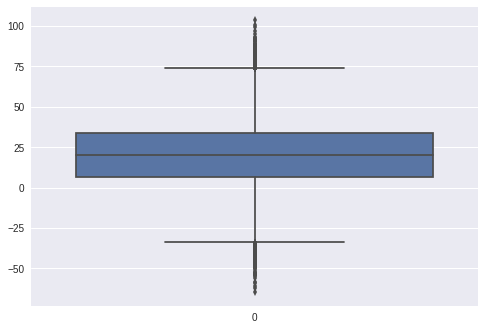

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)

** Method 3— DBScan Clustering:**

DBScan is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data. Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. In this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts. DBScan has three important concepts:

Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster.
Border Points are in the same cluster as core points but much further away from the centre of the cluster.

![alt text](https://cdn-images-1.medium.com/max/800/1*d35zOOP2PQ13ZROxr9ddjA.png)

Source:https://stackoverflow.com/questions/34394641/dbscan-clustering-what-happens-when-border-point-of-one-cluster-is-considered
Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.


In [0]:
from sklearn.cluster import DBSCAN

random_data = np.random.randn(50000,2)  * 20 + 20
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)


**Method 4— Isolation Forest:**

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.

In [0]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

**Method 5— Robust Random Cut Forest: **

Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. It works by associating an anomaly score as well. Low score values indicate that the data point is considered “normal.” High values indicate the presence of an anomaly in the data. The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous. The details of the algorithm can be found in this paper.

[video](https://youtu.be/yx1vf3uapX8)

[code](https://github.com/awslabs/amazon-sagemaker-examples/tree/master/introduction_to_amazon_algorithms/random_cut_forest)
